In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import os
import numpy as np
import matplotlib.pyplot as plt

In [70]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of Y_test: (10000,)


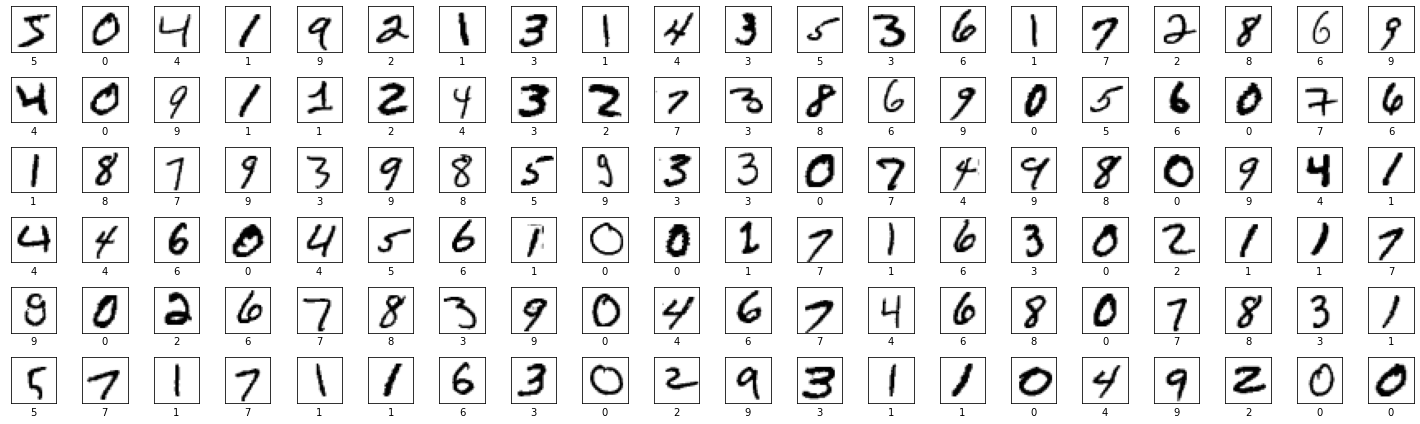

In [71]:
ROWS = 6
COLS = 20
i = 0
plt.figure(figsize=(20,6))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i], cmap=plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [72]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [73]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)               

In [74]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


In [75]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=38)

Epoch 1/5
1264/1264 [==============================] - 20s 16ms/step - loss: 0.2306 - accuracy: 0.9275 - val_loss: 0.1040 - val_accuracy: 0.9682
Epoch 2/5
1264/1264 [==============================] - 22s 17ms/step - loss: 0.0709 - accuracy: 0.9778 - val_loss: 0.0563 - val_accuracy: 0.9837
Epoch 3/5
1264/1264 [==============================] - 22s 17ms/step - loss: 0.0509 - accuracy: 0.9839 - val_loss: 0.0605 - val_accuracy: 0.9820
Epoch 4/5
1264/1264 [==============================] - 22s 17ms/step - loss: 0.0385 - accuracy: 0.9881 - val_loss: 0.0610 - val_accuracy: 0.9817
Epoch 5/5
1264/1264 [==============================] - 22s 17ms/step - loss: 0.0298 - accuracy: 0.9909 - val_loss: 0.0504 - val_accuracy: 0.9866


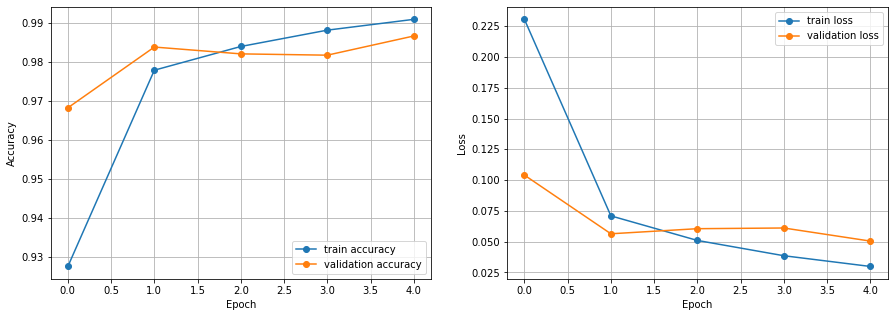

In [76]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [77]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.0458 - accuracy: 0.9859

Test Accuracy: 0.9858999848365784

Test Loss: 0.04584516957402229


In [89]:
model.compile(
   optimizer='RMSProp', 
   loss='sparse_categorical_crossentropy', 
   metrics=['accuracy']
 )

In [90]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=38)

Epoch 1/5
1264/1264 [==============================] - 20s 16ms/step - loss: 0.0109 - accuracy: 0.9970 - val_loss: 0.0634 - val_accuracy: 0.9883
Epoch 2/5
1264/1264 [==============================] - 21s 17ms/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 0.0654 - val_accuracy: 0.9883
Epoch 3/5
1264/1264 [==============================] - 21s 17ms/step - loss: 0.0104 - accuracy: 0.9972 - val_loss: 0.0835 - val_accuracy: 0.9874
Epoch 4/5
1264/1264 [==============================] - 21s 17ms/step - loss: 0.0099 - accuracy: 0.9976 - val_loss: 0.0739 - val_accuracy: 0.9914
Epoch 5/5
1264/1264 [==============================] - 21s 17ms/step - loss: 0.0090 - accuracy: 0.9975 - val_loss: 0.0708 - val_accuracy: 0.9906


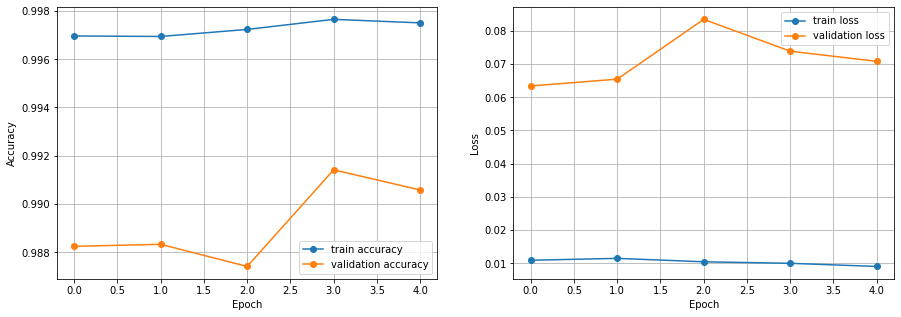

In [91]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [92]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.0599 - accuracy: 0.9905

Test Accuracy: 0.9904999732971191

Test Loss: 0.059853386133909225


In [88]:
model.compile(
   optimizer='SGD', 
   loss='sparse_categorical_crossentropy', 
   metrics=['accuracy']
 )

In [83]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=38)

Epoch 1/5
1264/1264 [==============================] - 22s 17ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0494 - val_accuracy: 0.9909
Epoch 2/5
1264/1264 [==============================] - 22s 17ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0485 - val_accuracy: 0.9912
Epoch 3/5
1264/1264 [==============================] - 22s 17ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0479 - val_accuracy: 0.9911
Epoch 4/5
1264/1264 [==============================] - 23s 18ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0479 - val_accuracy: 0.9912
Epoch 5/5
1264/1264 [==============================] - 22s 18ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0480 - val_accuracy: 0.9911


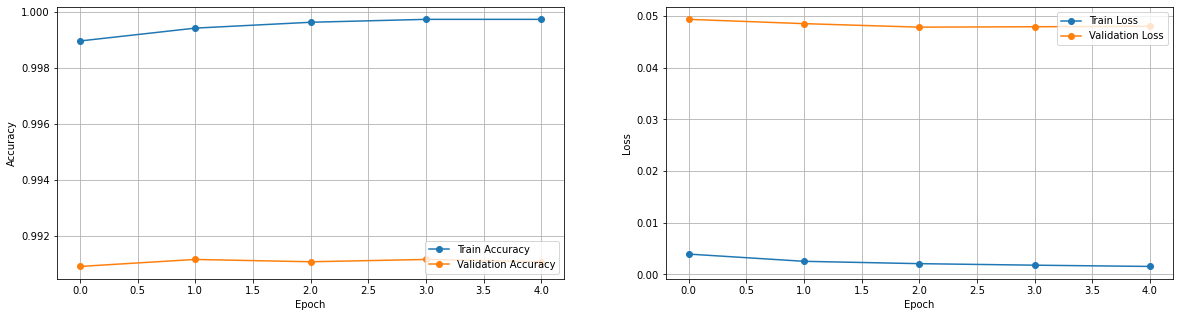

In [84]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], 'o-', label='Train Accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], 'o-', label='Train Loss')
plt.plot(h.history['val_loss'], 'o-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [85]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.0411 - accuracy: 0.9916

Test Accuracy: 0.991599977016449

Test Loss: 0.04110991954803467
